# Задание к занятию «Проверка точности модели, переобучение, регуляризация»

Определите модель с наилучшим показателем метрики accuracy, используя различные модели и варьируя их параметры на датасете load_digits.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab
from sklearn.datasets import load_digits

## Загрузка данных

In [2]:
data = load_digits()

In [3]:
X, y = pd.DataFrame(data.data), pd.Series(data.target)

## Выбор модели

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

def tune_models(models_params, X, y, n_splits=3, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for model, params in models_params:
        try:
            model.set_params(random_state=random_state)
        except:
            pass
        tune_model(model, params, X_train, X_test, y_train, y_test, cv)

def tune_model(model, params, X_train, X_test, y_train, y_test, cv):
    grid = GridSearchCV(model, params, cv=cv, scoring='accuracy')
    grid.fit(X_train, y_train)
    print("\n" + ("-" * 20))
    print(model.__class__.__name__)
    print("Cross val score:", grid.best_score_)
    print("Test score:", grid.score(X_test, y_test))
    print("Params:", grid.best_params_)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

tune_models([
    (LogisticRegression(tol=0.01, class_weight='balanced'), {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 2, 3, 4],
    }),
    (DecisionTreeClassifier(), {
        'max_depth': range(3, 15),
        'min_samples_split': range(2, 5),
        'min_samples_leaf': range(1, 5),
    }),    
    (RandomForestClassifier(), {
        'n_estimators': range(30, 120, 10),
    }),     
    (KNeighborsClassifier(), {
        'n_neighbors': range(3, 10),
    }),    
    (SVC(probability=True, kernel='rbf', gamma=0.001), {
        'C': [0.01, 0.1, 1, 2],
    }),     
    (GaussianNB(), {})
], X, y, 10, random_state=777)


--------------------
LogisticRegression
Cross val score: 0.970304380104
Test score: 0.946666666667
Params: {'C': 0.1, 'penalty': 'l2'}

--------------------
DecisionTreeClassifier
Cross val score: 0.844097995546
Test score: 0.855555555556
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

--------------------
RandomForestClassifier
Cross val score: 0.977728285078
Test score: 0.96
Params: {'n_estimators': 90}

--------------------
KNeighborsClassifier
Cross val score: 0.990348923534
Test score: 0.975555555556
Params: {'n_neighbors': 3}

--------------------
SVC
Cross val score: 0.993318485523
Test score: 0.984444444444
Params: {'C': 1}

--------------------
GaussianNB
Cross val score: 0.8285077951
Test score: 0.846666666667
Params: {}


## Предыдущие результаты

```
--------------------
LogisticRegression
Cross val score: 0.96288047513
Test score: 0.964444444444
Params: {'C': 2, 'penalty': 'l1'}

--------------------
DecisionTreeClassifier
Cross val score: 0.856718634001
Test score: 0.84
Params: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}

--------------------
RandomForestClassifier
Cross val score: 0.968819599109
Test score: 0.984444444444
Params: {'n_estimators': 70}

--------------------
KNeighborsClassifier
Cross val score: 0.984409799555
Test score: 0.986666666667
Params: {'n_neighbors': 4}

--------------------
SVC
Cross val score: 0.988121752042
Test score: 0.988888888889
Params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
```

## Тюним отдельные параметры

In [8]:
from matplotlib import pylab
%pylab inline
%config InlineBackend.figure_format = 'svg' 

def plot_param(model, param, param_values, X, y, cv=5):
    param_scores = [
        (param_value, cross_val_score(
            model.set_params(**{param: param_value}), X, y, scoring='accuracy', cv=cv
        ).mean()) 
        for param_value in param_values
    ]
    pd.DataFrame(param_scores).set_index(0).plot();
    return param_scores;

Populating the interactive namespace from numpy and matplotlib


[(1, 0.19752670466761271),
 (2, 0.31451386946470289),
 (3, 0.46052296385979463),
 (4, 0.54749506039669671),
 (5, 0.6484519792201493),
 (6, 0.74530016510613084),
 (7, 0.80290532531539416),
 (8, 0.81337858379353045),
 (9, 0.84029653987787489),
 (10, 0.83677871020340144)]

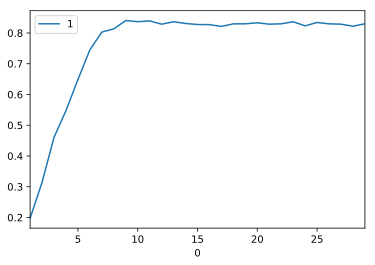

In [35]:
# max_depth DecisionTreeClassifier
# 8-9 — максимум, после чего переобучение
plot_param(
    DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=2),
    'max_depth', range(1, 30),
    X, y, 20
)[:10]

[(1, 0.81748780664453202),
 (2, 0.82481829192650769),
 (3, 0.81864788319465942),
 (4, 0.81245507235114167),
 (5, 0.80577919771508155),
 (6, 0.80861347266800054),
 (7, 0.80872261304029891),
 (8, 0.80422570862952958),
 (9, 0.79810535675377148)]

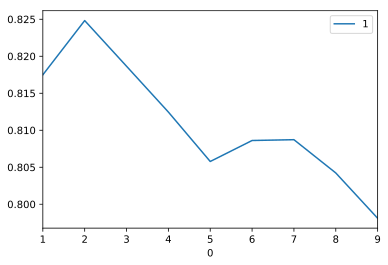

In [37]:
# min_samples_leaf = 2
plot_param(
    DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=2),
    'min_samples_leaf', range(1, 10),
    X, y, 30
)[:10]

[(0.001, 0.12171624583158555),
 (0.01, 0.22117283747502356),
 (0.1, 0.95212216243773629),
 (1, 0.97889452941133492),
 (2, 0.98164609453578144)]

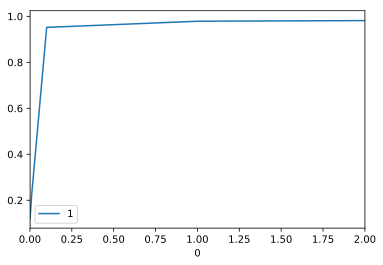

In [49]:
# SVC C=1-2
plot_param(
    SVC(kernel='rbf', gamma=0.001),
    'C', [0.001, 0.01, 0.1, 1, 2],
    X, y, 10
)[:10]

[(0.0005, 0.97445826943235547),
 (0.001, 0.97889452941133492),
 (0.005, 0.9276785578122787),
 (0.01, 0.73676424110640326)]

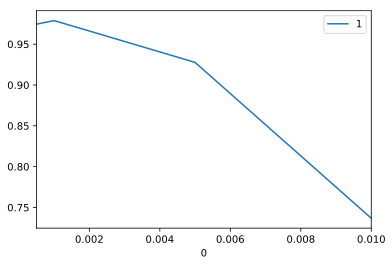

In [51]:
# SVC gamma=0.001
plot_param(
    SVC(kernel='rbf', C=1),
    'gamma', [0.0005, 0.001, 0.005, 0.01],
    X, y, 10
)[:10]

[(1, 0.72713901705931794),
 (6, 0.88986485074377719),
 (11, 0.92783928314202646),
 (16, 0.9370795218687652),
 (21, 0.93269838031663976),
 (26, 0.94671061233529774),
 (31, 0.94833411251377164),
 (36, 0.95341211340019394),
 (41, 0.95163957915037523),
 (46, 0.94786101298471404)]

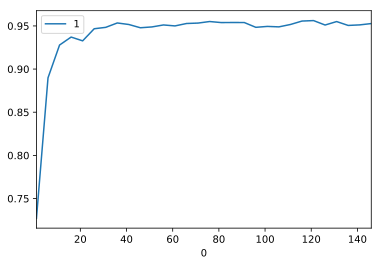

In [20]:
plot_param(
    RandomForestClassifier(),
    'n_estimators', range(1, 150, 5),
    X, y, 10
)[:10]